In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import pandas as pd
from churn_predictor.dataset import get_cleaned_dataframe
import churn_predictor.plot as plots
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [54]:
def summary_cat_var(df, column, cbe=True):
    if cbe:
        df_not_ex = df[df['Exited'] == 0]
        df_exited = df[df['Exited'] == 1]
        print('For Exited = 0:')
        plots.plot_bar_charts(df_not_ex, column)
        print(df_not_ex[[column]].value_counts(normalize=True))
        print('\n\nFor Exited = 1:')
        plots.plot_bar_charts(df_exited, column)
        print(df_exited[[column]].value_counts(normalize=True))
    else:
        plots.plot_bar_charts(df, column)
        print(df[[column]].value_counts(normalize=True))

def summary_num_var(df, column, cbe=True):
    if cbe:
        df_not_ex = df[df['Exited'] == 0]
        df_exited = df[df['Exited'] == 1]
        print('For Exited = 0:')
        plots.plot_histograms(df_not_ex, column, bins=25)
        plots.plot_horizontal_boxplot(df_not_ex, column)
        print('\nFor Exited = 1:')
        plots.plot_histograms(df_exited, column, bins=25)
        plots.plot_horizontal_boxplot(df_exited, column)
        print('\n',df.groupby('Exited')[column].describe())
    else:
        plots.plot_histograms(df, column, bins=25)
        plots.plot_horizontal_boxplot(df, column)
        print('\n',df.groupby('Exited')[column].describe())

In [42]:
df = get_cleaned_dataframe()

In [43]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0    15634602  Hargrave          619    France  Female  42.0       2   
1    15647311      Hill          608     Spain  Female  41.0       1   
2    15619304      Onio          502    France  Female  42.0       8   
3    15701354      Boni          699    France  Female  39.0       1   
4    15574012       Chu          645     Spain    Male  44.0       8   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1        1.0             1.0        101348.88   
1   83807.86              1        0.0             1.0        112542.58   
2  159660.80              3        1.0             0.0        113931.57   
3       0.00              2        0.0             0.0         93826.63   
4  113755.78              2        1.0             0.0        149756.71   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       1

**Dataset Attributes**

- Customer ID: A unique identifier for each customer.  
- Surname: The customer's surname or last name.  
- Credit Score: A numerical value representing the customer's credit score.  
- Geography: The country where the customer resides (France, Spain, or Germany).  
- Gender: The customer's gender (Male or Female).  
- Age: The customer's age.  
- Tenure: The number of years the customer has been with the bank.  
- Balance: The customer's account balance.  
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card).  
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no).  
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no).  
- EstimatedSalary: The estimated salary of the customer.  
- Exited: Whether the customer has churned (1 = yes, 0 = no).  

**Variable Types**

- Categorical: `Geography`, `Gender`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `Exited`.  
- Numerical: `CreditScore`, `Age`, `Tenure`, `Balance`, `EstimatedSalary`.  

**Analysis Plan**

Univariate Analysis
   - Numerical Variables: Histograms, boxplots, summary statistics (mean, median, IQR).  
   - Categorical Variables: Frequency tables, bar plots, proportions.  

Bivariate Analysis
   - Numerical vs. Numerical: Correlation analysis (Pearson/Spearman), scatter plots.  
   - Categorical vs. Categorical: Crosstabs, Chi-square test.  
   - Categorical vs. Numerical: Boxplots, T-tests (for two categories), ANOVA (for multiple categories).  

In [44]:
cat_vars = [
    'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'
]
num_vars = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'
]

In [45]:
df_exited = df[df['Exited'] == 1]
df_not_ex = df[df['Exited'] == 0]

In [53]:
df_exited.describe()

CustomerId  CreditScore          Age       Tenure        Balance  \
count  2.037000e+03  2037.000000  2037.000000  2037.000000    2037.000000   
mean   1.569005e+07   645.351497    44.837997     4.932744   91108.539337   
std    7.269262e+04   100.321503     9.761562     2.936106   58360.794816   
min    1.556571e+07   350.000000    18.000000     0.000000       0.000000   
25%    1.562736e+07   578.000000    38.000000     2.000000   38340.020000   
50%    1.568896e+07   646.000000    45.000000     5.000000  109349.290000   
75%    1.575309e+07   716.000000    51.000000     8.000000  131433.330000   
max    1.581566e+07   850.000000    84.000000    10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  Exited  
count    2037.000000  2037.000000     2037.000000      2037.000000  2037.0  
mean        1.475209     0.699067        0.360825    101465.677531     1.0  
std         0.801521     0.458776        0.480358     57912.418071     0.0  
min         1.000000     0.000000        0.000000        11.580000     1.0  
25%         1.000000     0.000000        0.000000     51907.720000     1.0  
50%         1.000000     1.000000        0.000000    102460.840000     1.0  
75%         2.000000     1.000000        1.000000    152422.910000     1.0  
max         4.000000     1.000000        1.000000    199808.100000     1.0

In [47]:
df_not_ex.describe()

CustomerId  CreditScore          Age       Tenure        Balance  \
count  7.959000e+03  7959.000000  7959.000000  7959.000000    7959.000000   
mean   1.569117e+07   651.821837    37.406713     5.033924   72731.327111   
std    7.173432e+04    95.617433    10.125783     2.880873   62847.133055   
min    1.556570e+07   405.000000    18.000000     0.000000       0.000000   
25%    1.562884e+07   585.000000    31.000000     3.000000       0.000000   
50%    1.569154e+07   653.000000    36.000000     5.000000   92053.440000   
75%    1.575335e+07   718.000000    41.000000     7.000000  126388.300000   
max    1.581569e+07   850.000000    92.000000    10.000000  221532.800000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  Exited  
count    7959.000000  7959.000000     7959.000000      7959.000000  7959.0  
mean        1.544289     0.707124        0.554341     99758.889377     0.0  
std         0.509539     0.455111        0.497070     57409.209949     0.0  
min         1.000000     0.000000        0.000000        90.070000     0.0  
25%         1.000000     0.000000        0.000000     50783.490000     0.0  
50%         2.000000     1.000000        1.000000     99661.460000     0.0  
75%         2.000000     1.000000        1.000000    148650.325000     0.0  
max         3.000000     1.000000        1.000000    199992.480000     0.0

**Univariate Analysis**

Se evaluarán métricas como medidas de tendencia central

In [48]:
df[num_vars].describe()

CreditScore          Age       Tenure        Balance  EstimatedSalary
count  9996.000000  9996.000000  9996.000000    9996.000000      9996.000000
mean    650.503301    38.921071     5.013305   76476.263216    100106.701248
std      96.624668    10.488421     2.892353   62397.118820     57513.314398
min     350.000000    18.000000     0.000000       0.000000        11.580000
25%     584.000000    32.000000     3.000000       0.000000     51002.110000
50%     652.000000    37.000000     5.000000   97173.290000    100238.110000
75%     717.250000    44.000000     7.250000  127639.372500    149400.107500
max     850.000000    92.000000    10.000000  250898.090000    199992.480000

Las variable numérica con una distribución asimétrica es `Balance`.

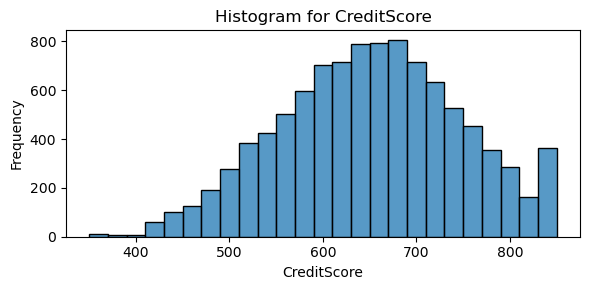

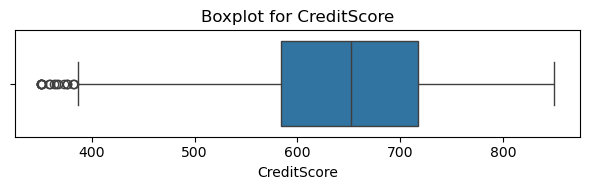


          count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7959.0  651.821837   95.617433  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0


In [55]:
summary_num_var(df, 'CreditScore', False)

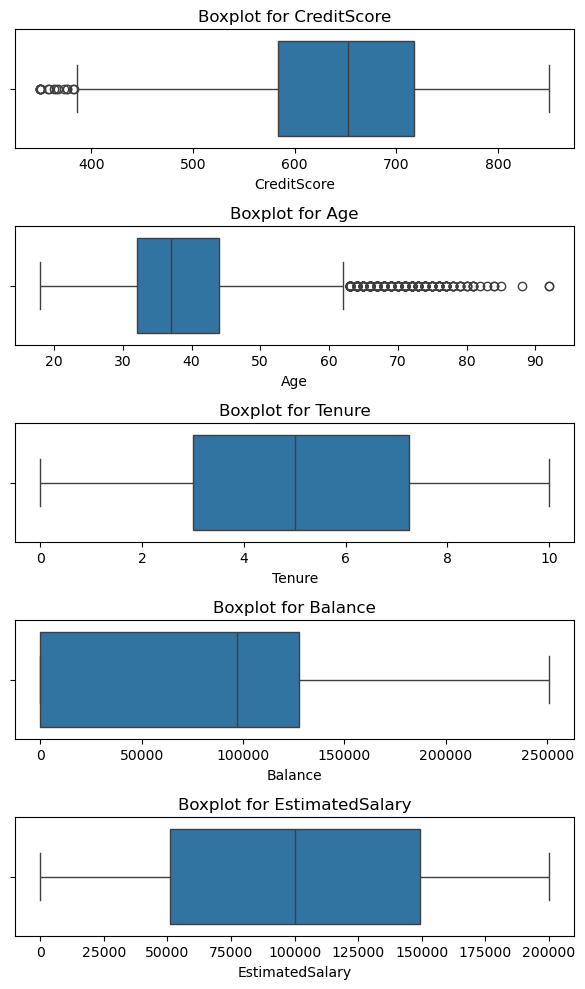

In [49]:
plots.plot_horizontal_boxplot(df, num_vars)

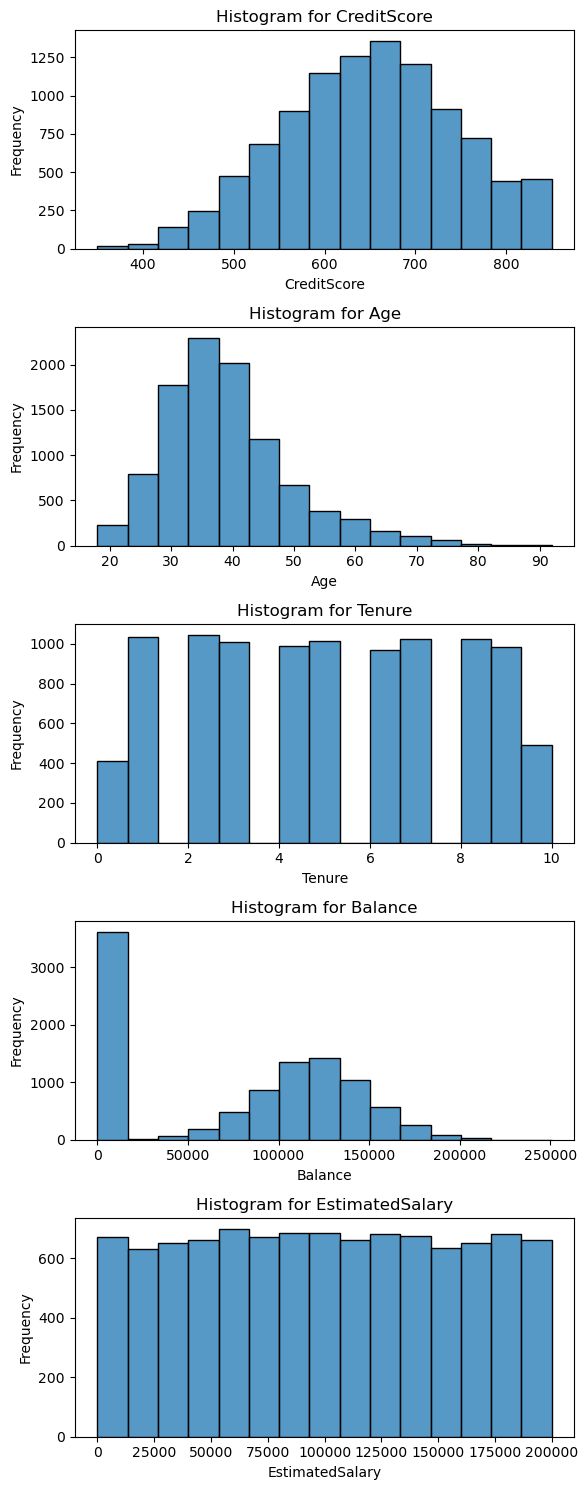

In [50]:
plots.plot_histograms(df, num_vars, bins=15)

Observaciones:

Hay pocos clientes con poco score crediticio, los cuales representan los outliers hallados. ¿Los clientes con poco score crediticio son los que más abandonan o los que menos abandonan?

La edad tiene la distribución esperada, con varios clientes que han alcanzado edades de hasta 90 años. ¿Hay alguna edad en particular en la que los clientes abandonen?

La distribución de la variable Tenure es uniforme, con una frecuencia menos para los clientes que han tenido 0 o 10 años la cuenta bancaria. ¿El tiempo influye en el abandono del cliente?

Hay varios clientes con poco balance entre 0 y 25000 en su cuenta. ¿Los clientes con poco balance son los que más abandonan?

Todos los clientes tienen 1 producto o más ¿la cantidad de los productos representa fidelidad?

El salario estimado tiene una distribución uniforme. ¿El salario influye en el abandono de clientes si quiera?

**Bivariate Analysis**

For Exited = 0:


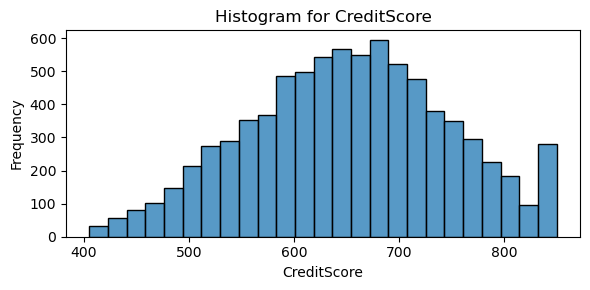


For Exited = 1:


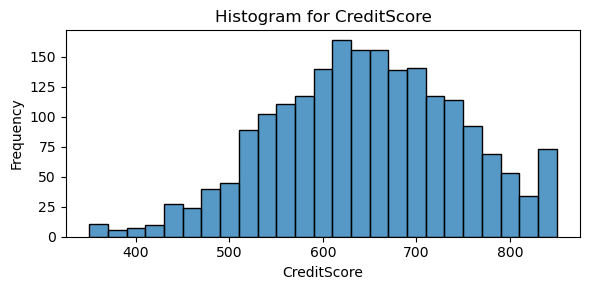


          count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7959.0  651.821837   95.617433  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0


In [13]:
summary_num_var(df, 'CreditScore')

In [14]:
df_exited[df_exited['CreditScore'] < 405]['CustomerId'].count()

np.int64(21)

¿Los clientes con poco score crediticio son los que más abandonan o los que menos abandonan?
Efectivamente, hay una pequeña cantidad de clientes con un score crediticio menor a 400 que abandonan (1% de entre los que abandonan). No obstante, la mayoría de clientes que abandonan tienen diferentes scores crediticios, inclusive algunos llegando al máximo posible (850). ¿Este máximo qué representa?

For Exited = 0:


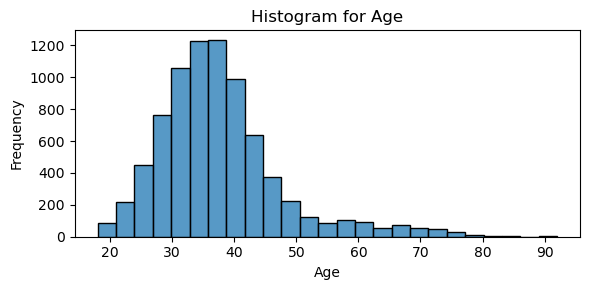


For Exited = 1:


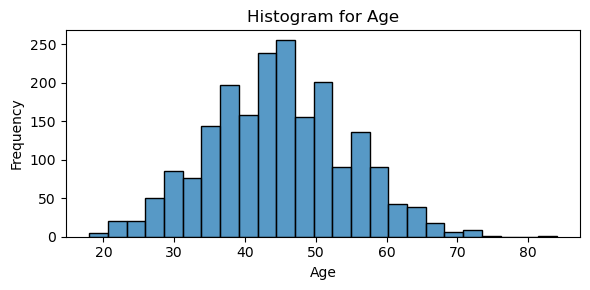


          count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7959.0  37.406713  10.125783  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0


In [15]:
summary_num_var(df, 'Age')

In [16]:
df_exited['Age'].value_counts().iloc[:20]

Age
46.0    91
40.0    89
43.0    88
45.0    87
48.0    80
42.0    77
47.0    77
49.0    75
44.0    73
39.0    72
50.0    71
41.0    69
51.0    66
52.0    64
38.0    63
37.0    62
35.0    57
36.0    53
54.0    51
56.0    50
Name: count, dtype: int64

¿Hay alguna edad en particular en la que los clientes abandonen? 
Efectivamente, la mayoría de clientes abandonan entre los 35 y 56 años, pero hay que tener en cuenta que cumple con la distribución que tenía originalmente, por lo que no es raro que la mayoría de los clientes que abandonan tengan edades dentro de ese rango. La media de edad de clientes que se retiran es de 44.8 mientras que la media de edad de clientes que no se retiran es de 37.4

For Exited = 0:


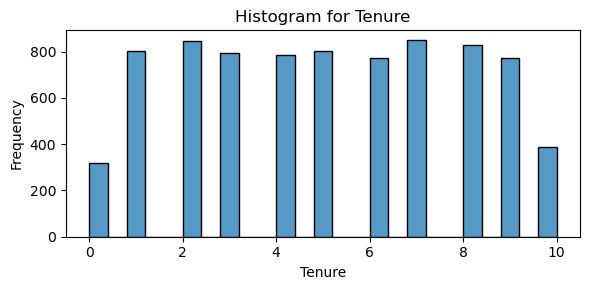


For Exited = 1:


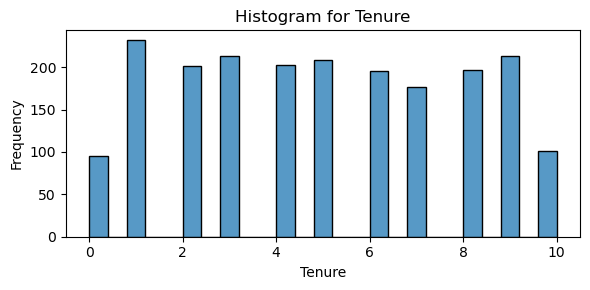


          count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7959.0  5.033924  2.880873  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0


In [17]:
summary_num_var(df, 'Tenure')

In [18]:
df_exited['Tenure'].value_counts(normalize=True)

Tenure
1     0.113893
3     0.104566
9     0.104566
5     0.102602
4     0.099656
2     0.098675
8     0.096711
6     0.096220
7     0.086892
10    0.049583
0     0.046637
Name: proportion, dtype: float64

¿El tiempo influye en el abandono del cliente? Los clientes abandonan más a partir del primer año con el banco. Siendo 1 el mayor año en el que los clientes abandonan 11%, seguido de 3 y 9 los años en los que la mayoría de clientes abandonan 10%, y 0 y 10 los años en el que menos abandonan 5%.

For Exited = 0:


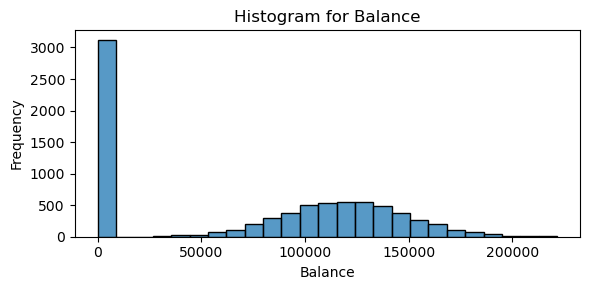


For Exited = 1:


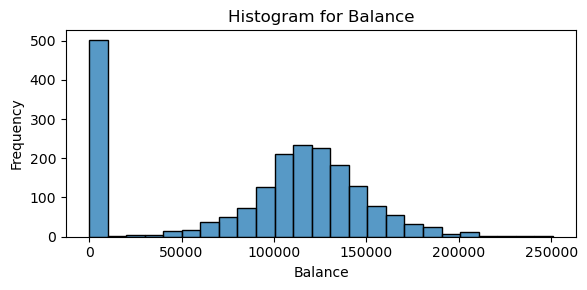


          count          mean           std  min       25%        50%  \
Exited                                                                 
0       7959.0  72731.327111  62847.133055  0.0      0.00   92053.44   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126388.30  221532.80  
1       131433.33  250898.09  


In [19]:
summary_num_var(df, 'Balance')

In [20]:
df_exited['Balance'].eq(0).value_counts(normalize=True)

Balance
False    0.754541
True     0.245459
Name: proportion, dtype: float64

In [21]:
df_not_ex['Balance'].eq(0).value_counts(normalize=True)

Balance
False    0.608494
True     0.391506
Name: proportion, dtype: float64

¿Los clientes con poco balance son los que abandonan? No realmente, los clientes que han salido tienen un balance medio mayor al de los clientes que no han salido. La proporción de clientes con 0 de Balance que no han salido es de 39.1%, por otro lado, la proporción de clientes con 0 de Balance que sí han salido es 24.5%.

For Exited = 0:


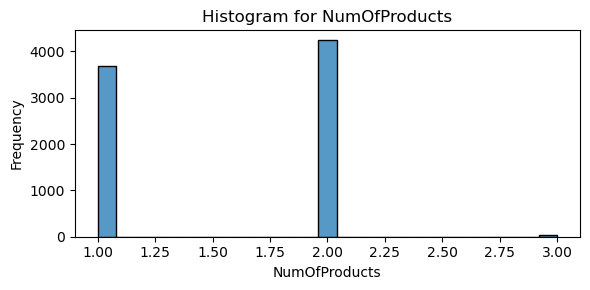


For Exited = 1:


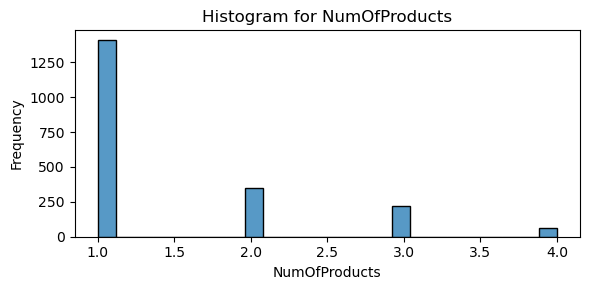


          count      mean       std  min  25%  50%  75%  max
Exited                                                     
0       7959.0  1.544289  0.509539  1.0  1.0  2.0  2.0  3.0
1       2037.0  1.475209  0.801521  1.0  1.0  1.0  2.0  4.0


In [22]:
summary_num_var(df, 'NumOfProducts')

In [23]:
df_exited['NumOfProducts'].value_counts(normalize=True)

NumOfProducts
1    0.691703
2    0.170839
3    0.108002
4    0.029455
Name: proportion, dtype: float64

In [24]:
df_not_ex['NumOfProducts'].value_counts(normalize=True)

NumOfProducts
2    0.53273
1    0.46149
3    0.00578
Name: proportion, dtype: float64

¿La cantidad de los productos representa fidelidad? Los únicos clientes que han adquirido 4 productos en total son los que han salido, aunque es una cantidad de clientes extremadamente pequeña (2%). Adicionalmente, estos clientes en su mayoría, 69%, han adquirido solo 1 producto, el 17% de ellos 2 productos y el 10% de ellos 3 productos.
Por otro lado, los clientes que no se han retirado, tienen en su mayoría, 53%, 2 productos y el 46% tienen solo 1 producto, el resto tienen 3.
Esto sugiere que los clientes fieles suelen en su mayoría adquirir sólo 1 o 2 productos, mientras que los clientes que se retiran tienen más probabilidad de hacerlo cuando adquieren más de 2 productos.

For Exited = 0:


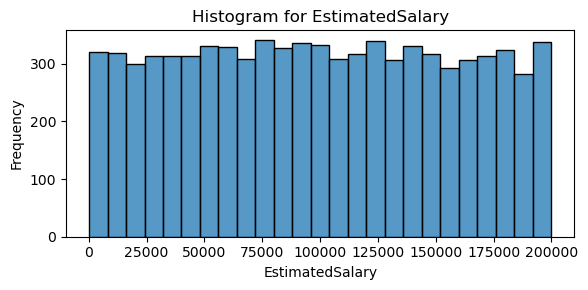


For Exited = 1:


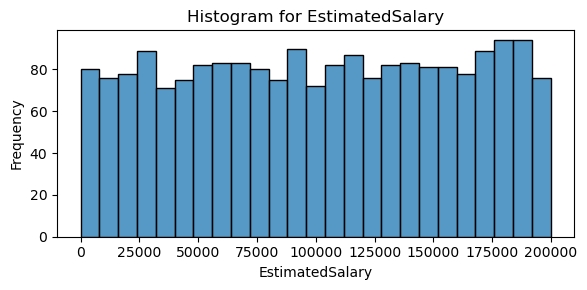


          count           mean           std    min       25%        50%  \
Exited                                                                    
0       7959.0   99758.889377  57409.209949  90.07  50783.49   99661.46   
1       2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

               75%        max  
Exited                         
0       148650.325  199992.48  
1       152422.910  199808.10  


In [25]:
summary_num_var(df, 'EstimatedSalary')

¿El salario influye en el abandono de clientes si quiera? No realmente, el salario de ambos es bastante similar, con un poco de diferencia entre sus medias.

For Exited = 0:


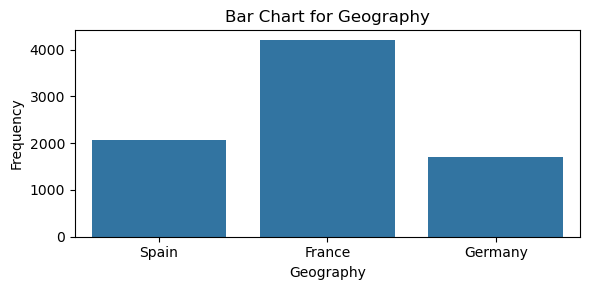

Geography
France       0.527830
Spain        0.259203
Germany      0.212966
Name: proportion, dtype: float64


For Exited = 1:


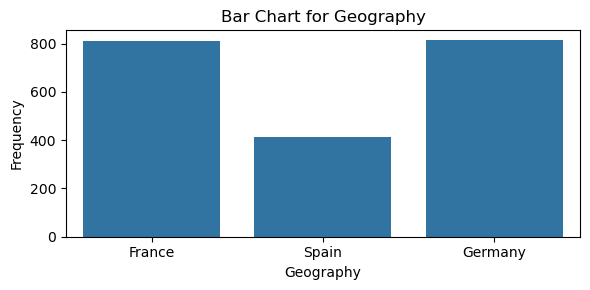

Geography
Germany      0.399607
France       0.397644
Spain        0.202749
Name: proportion, dtype: float64


In [26]:
summary_cat_var(df, 'Geography')

Los clientes que menos se retiran son de Spain, con un 20%. Mientras que, los de Germany y France tienen un 40%.
Por otro lado, los clientes que menos se han retirado son de France, con un 52%. Adicionalmente, Spain y Germany tiene un 25% y 21% respectivamente. Esto podría sugerir que los clientes de Spain tienen menos probabilidades de salir.

For Exited = 0:


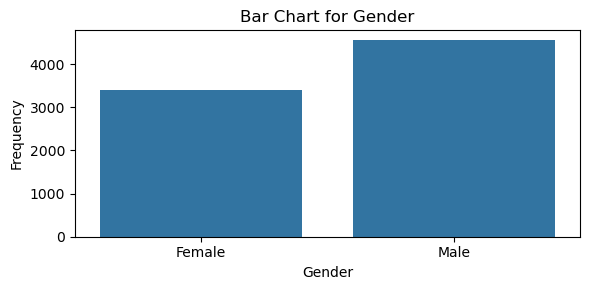

Gender
Male      0.572434
Female    0.427566
Name: proportion, dtype: float64


For Exited = 1:


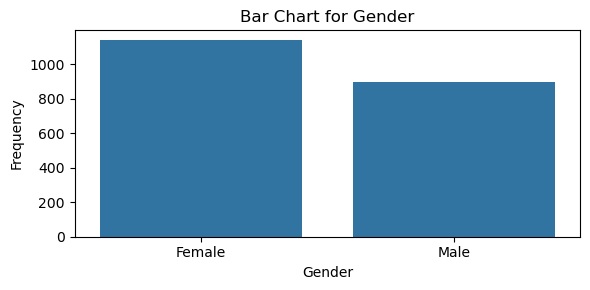

Gender
Female    0.559156
Male      0.440844
Name: proportion, dtype: float64


In [27]:
summary_cat_var(df, 'Gender')

Los clientes que más se retiran son mujeres. Con un 56% de proporción.
Por otro lado, la mayoría de clientes que aún permanencen dentro del banco son hombres, con un 57% de proporción.
Esto puede sugerir que las clientes mujeres tienden a abandonar el banco.

For Exited = 0:


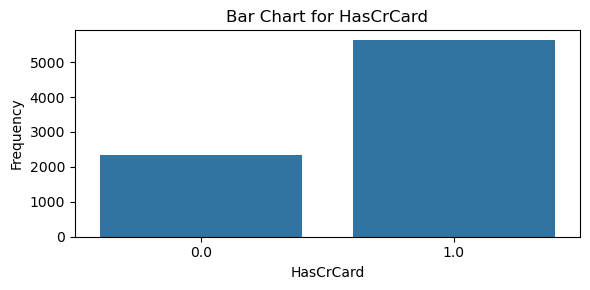

HasCrCard
1.0          0.707124
0.0          0.292876
Name: proportion, dtype: float64


For Exited = 1:


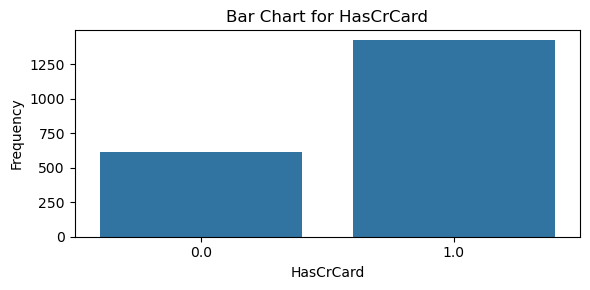

HasCrCard
1.0          0.699067
0.0          0.300933
Name: proportion, dtype: float64


In [28]:
summary_cat_var(df, 'HasCrCard')

Un 69.9% de los clientes que se han retirado tienen tarjeta de crédito. Por otro lado, los clientes que no se han retirado, el 70.7% tiene tarjeta de crédito, una diferencia del 0.8% entre ambos.

For Exited = 0:


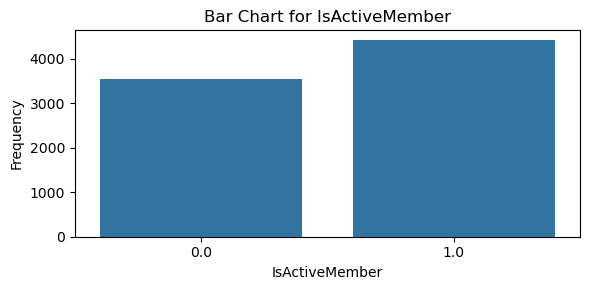

IsActiveMember
1.0               0.554341
0.0               0.445659
Name: proportion, dtype: float64


For Exited = 1:


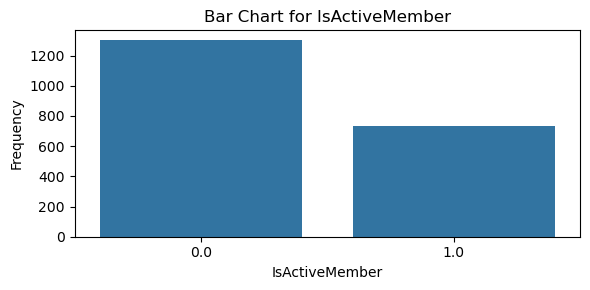

IsActiveMember
0.0               0.639175
1.0               0.360825
Name: proportion, dtype: float64


In [29]:
summary_cat_var(df, 'IsActiveMember')

La actividad al parecer es clave. El 63.9% de los clientes que se retiraron no eran miembros activos. Mientras que, el 55.4% de los clientes que no se han retirado son miembros activos.

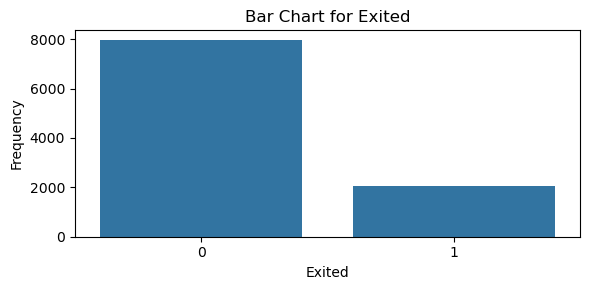

Exited
0    0.796218
1    0.203782
Name: proportion, dtype: float64


In [30]:
plots.plot_bar_charts(df, 'Exited')
print(df['Exited'].value_counts(normalize=True))

Finalmente, el 20.3% de los clientes se han retirado. El total de clientes es 9996.

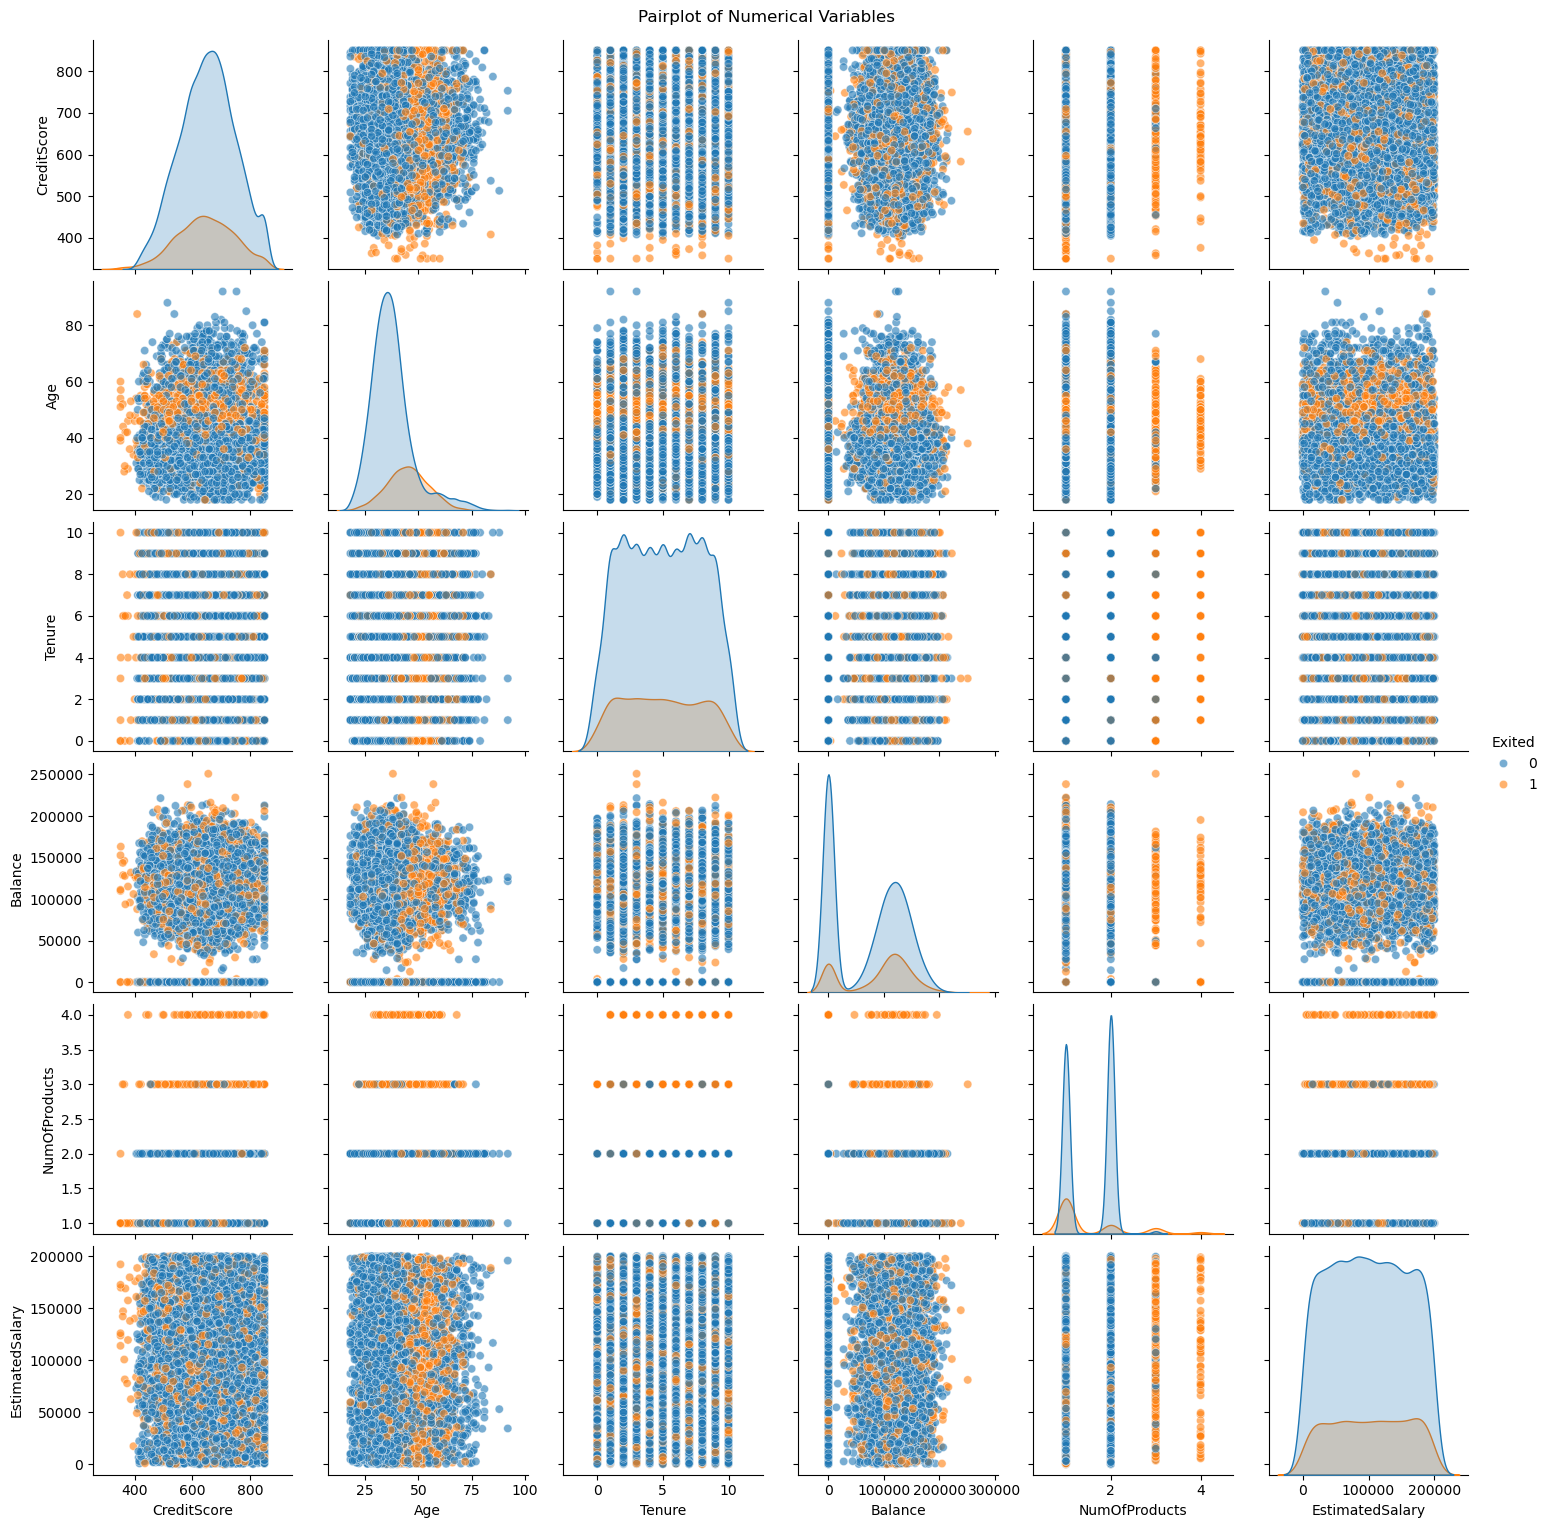

In [31]:
plots.plot_pairplot(df, num_vars, 'Exited')

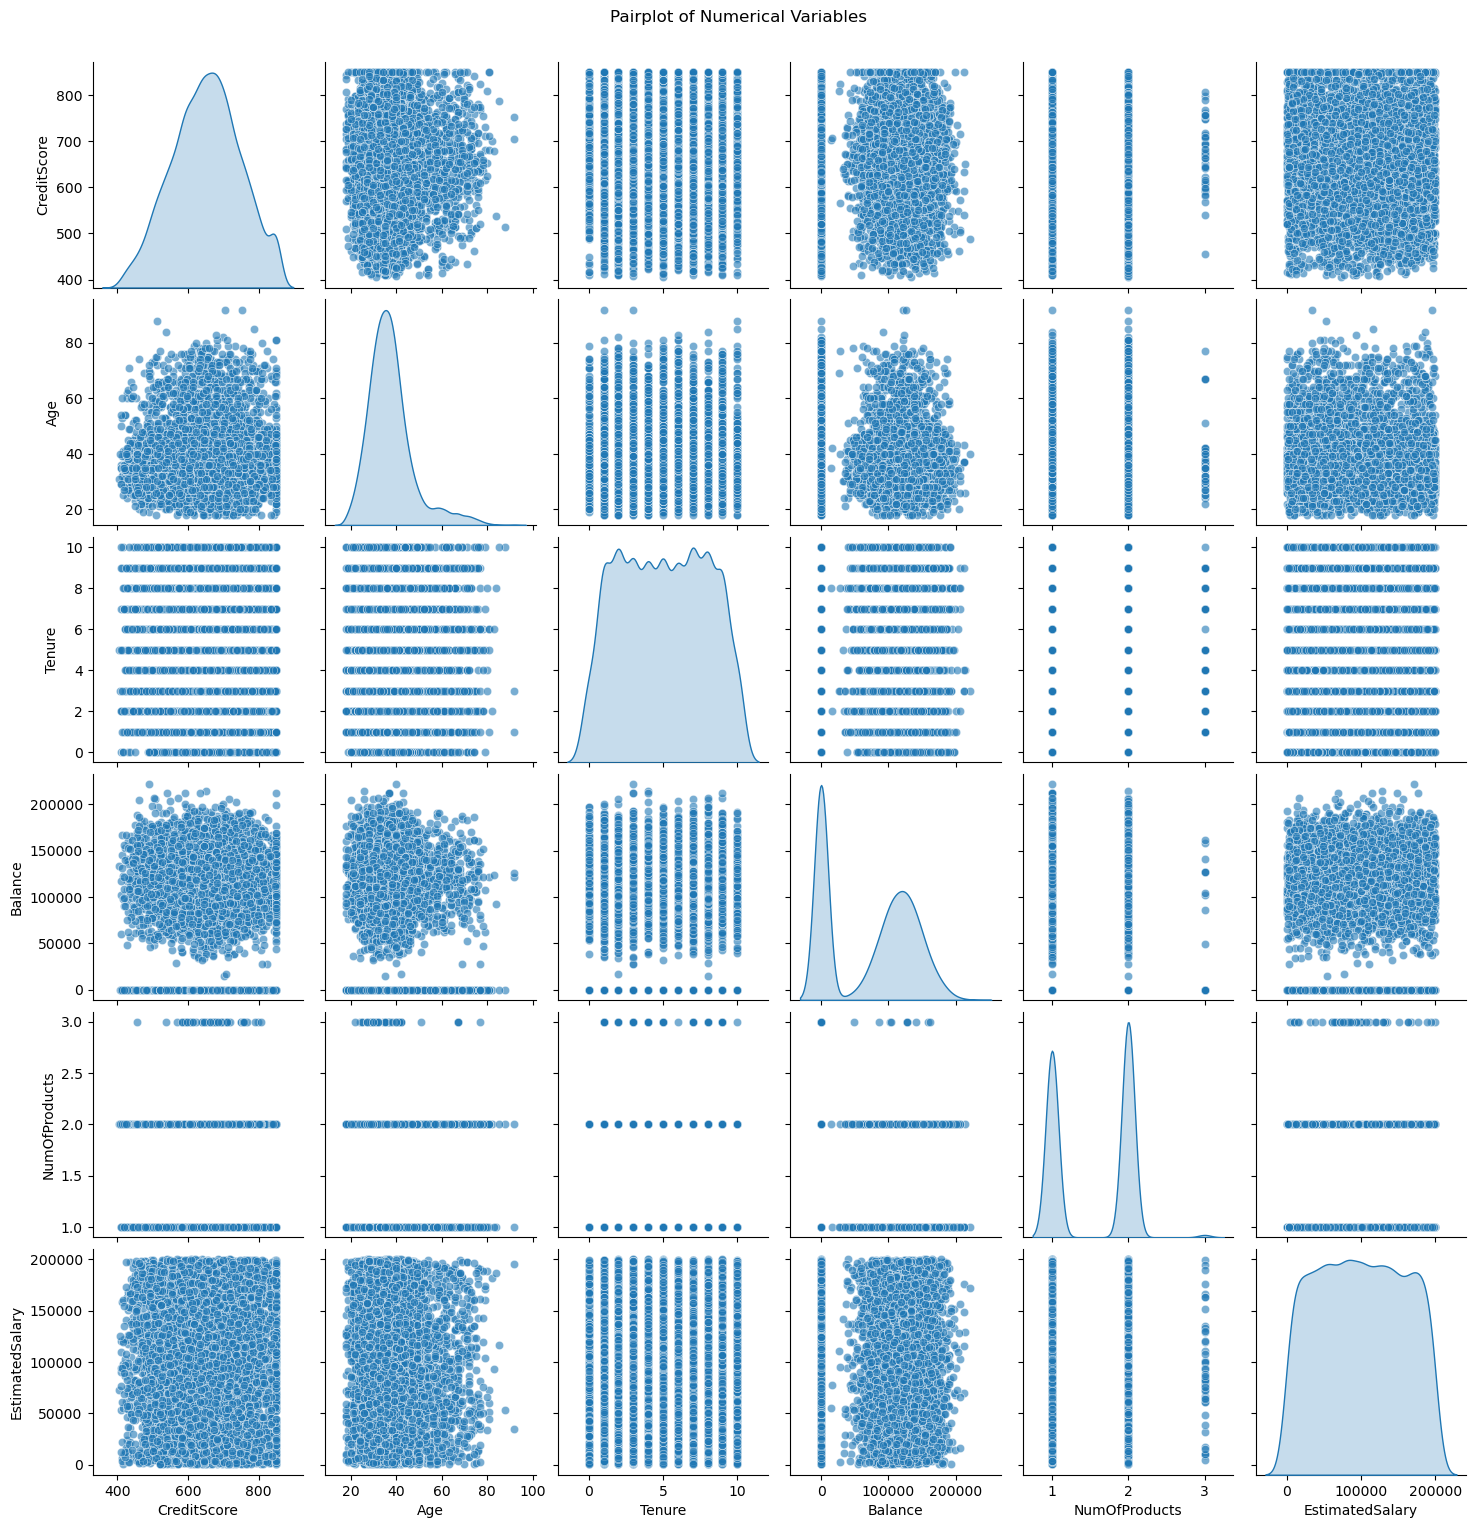

In [36]:
plots.plot_pairplot(df_not_ex, num_vars)

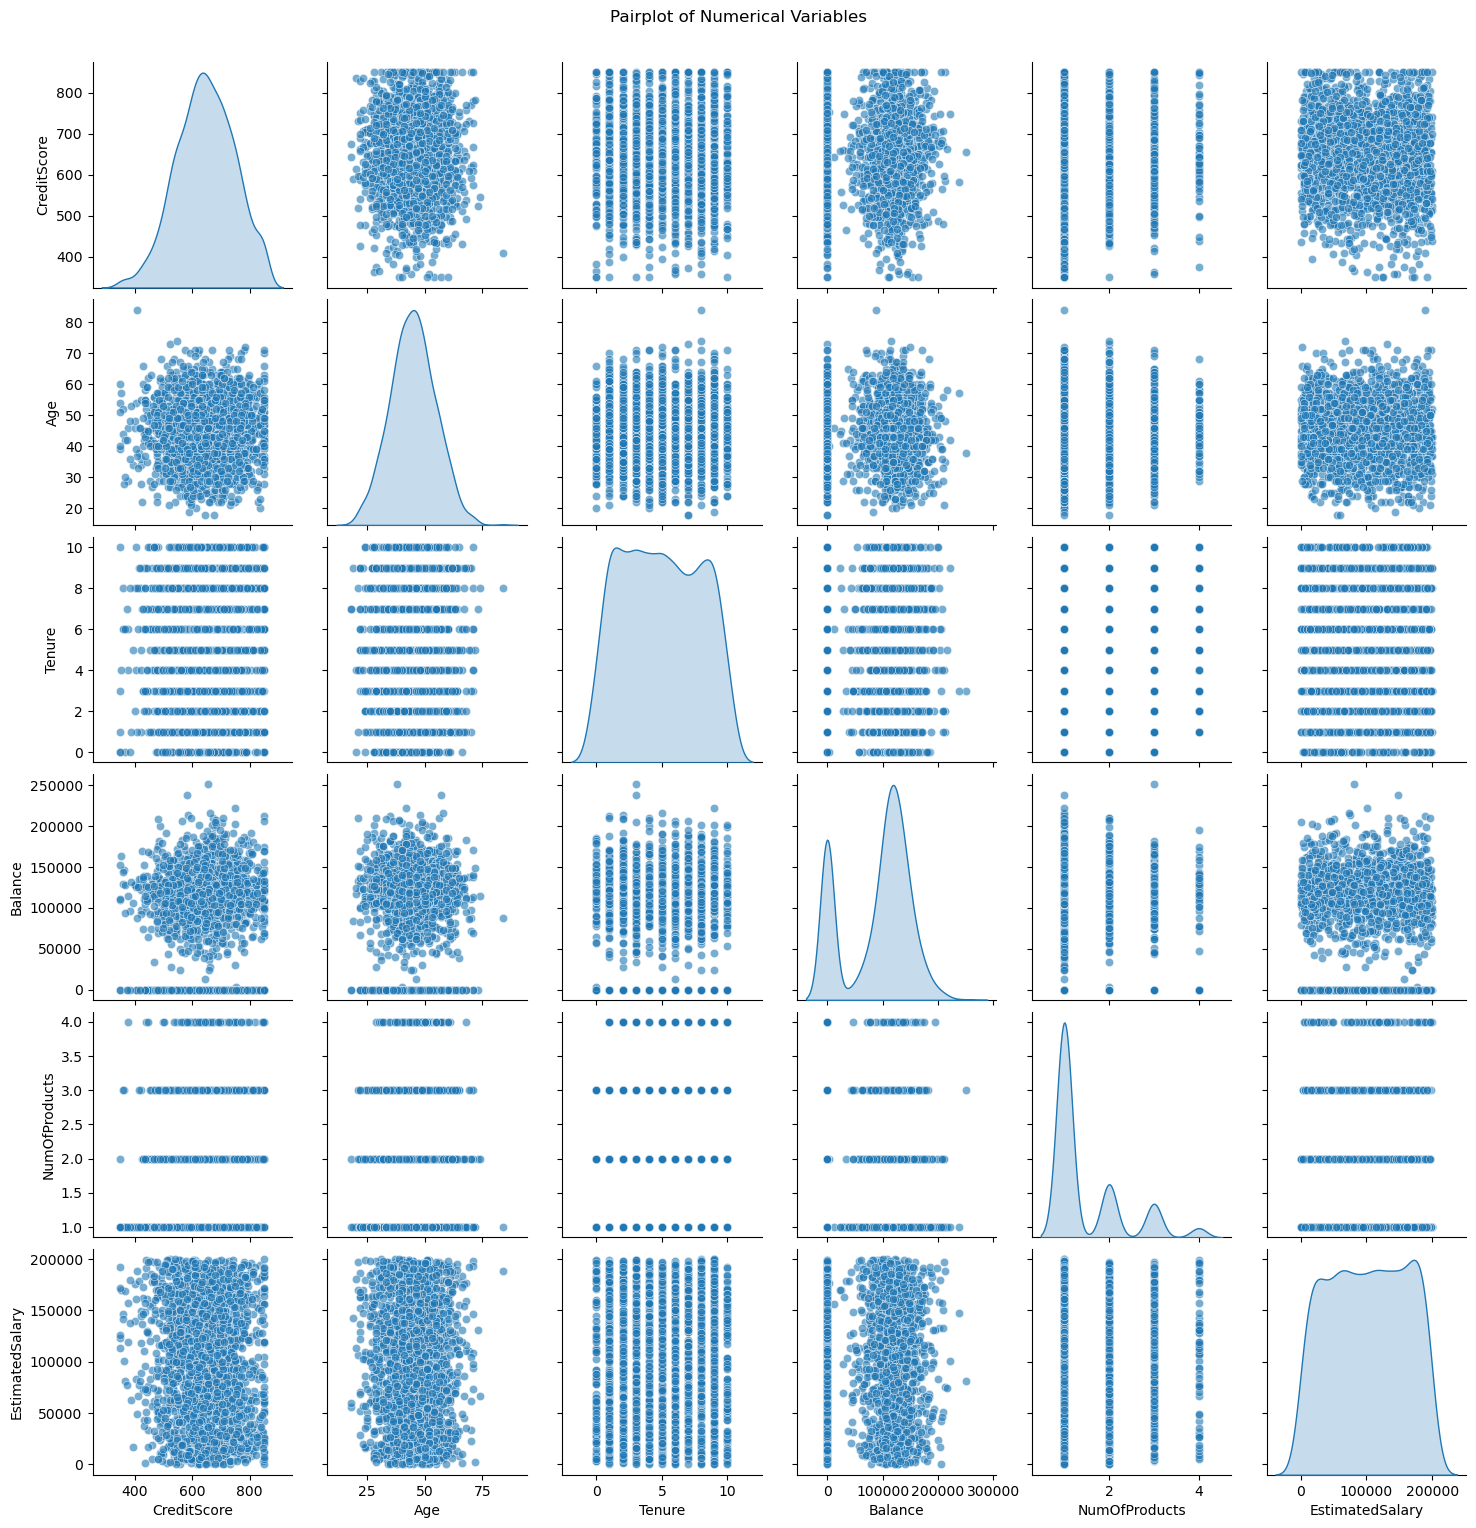

In [35]:
plots.plot_pairplot(df_exited, num_vars)

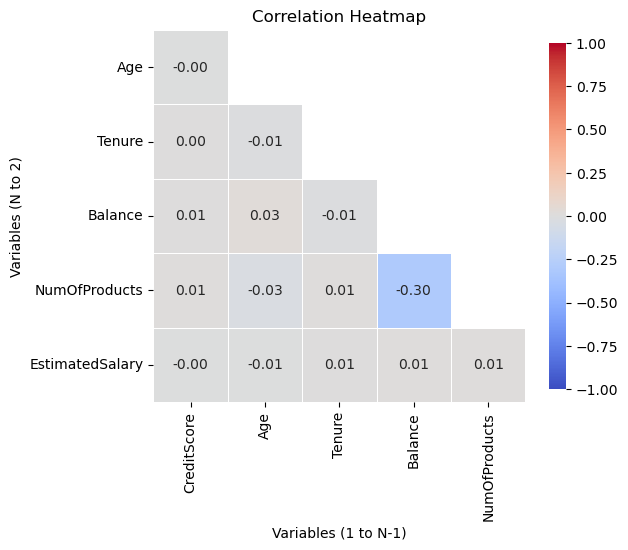

In [32]:
plots.plot_correlation_heatmap(df[num_vars])

Para todos los clientes en general sin categorizar, para las variables numéricas solo existe correlación inversa débil de -0.3 entre Balance y NumOfProducts. Se procederá a revisar esta correlación para los clientes que han salido y los que no.

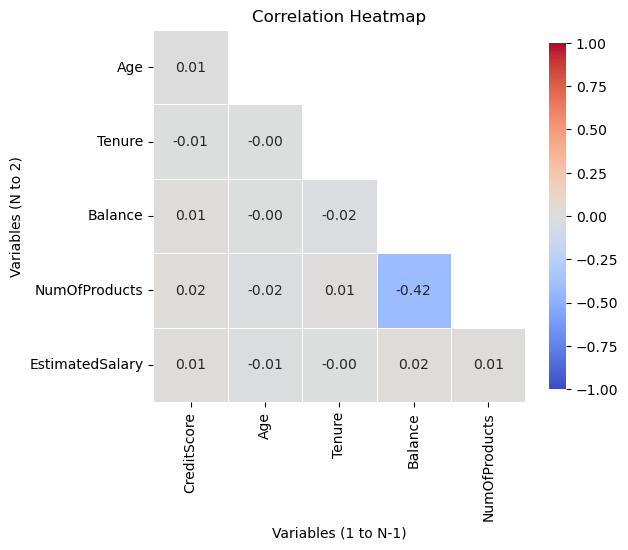

In [34]:
plots.plot_correlation_heatmap(df_not_ex[num_vars])

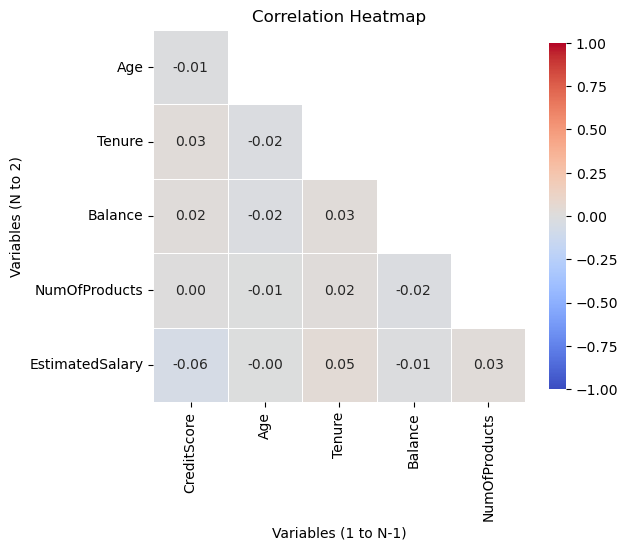

In [33]:
plots.plot_correlation_heatmap(df_exited[num_vars])

Categorizando los datos entre clientes que han salido y los que no, la correlación entre las variables Balance y NumOfProduct ascendió a 0 para los clientes que han salido y disminuyó a -0.42 para los clientes que no han salido. 